# Single Variable Analysis
---
### Notebook for Single Variable Analysis in all three processed datasets

Creation: 07.02.2021

## Required Libraries
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap
import json
import os

## Importing Processed Datasets and Variable Lookups
---

In [3]:
leeds_accidents = pd.read_csv('../data/processed/accidents_processed.csv')
leeds_vehicles = pd.read_csv('../data/processed/vehicles_processed.csv')
leeds_casualties = pd.read_csv('../data/processed/casualties_processed.csv')

- change 'Code' to 'code' for one column
- change 'M' to -1 in Propulsion Code

In [4]:
xls = pd.ExcelFile('../data/references/variable_lookup.xls')

# read in excel data into python dict of dicts
excel_dict = {i: xls.parse(xls.sheet_names[i]).to_dict() for i in range(len(xls.sheet_names))}

# create convenient lookup dictionary for all excel sheets
variable_lookup = {}
for x in range(len(excel_dict)):
    variable_lookup[x] = {}
    if x > 1:
        for i in range(len(excel_dict[x]['code'])):
            variable_lookup[x][excel_dict[x]['code'][i]] = excel_dict[x]['label'][i]

## Lookup and Variable Inspection¶
---

To efficiently analyse and plot singular attributes in the datasets, we need to keep track...
- ...of the column index of the column
- ...of the type of the variable (numerical, categorical)
- ...of the variable look-up for categorical data (those are taken from 'data/references/variable\ lookup.xls')

We therefore create a lookup dictionary for each of the datasets for a code efficient analysis.

### Accidents
---

In [5]:
accidents_labeling = [5, 6, 10, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30]
accidents_plotting = [None, None, None, None, None, 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', None]
accidents_fivenumsummary = [False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


# initialise the lookup dictionary with the column name and variable type
accidents_lookup = {}
for i in range(leeds_accidents.shape[1]):
    accidents_lookup[i] = {'Name': list(leeds_accidents)[i]}
    if accidents_plotting[i] == 'bar':
        accidents_lookup[i].update({'Plot': 'bar'})
    elif accidents_plotting[i] == 'hist':
        accidents_lookup[i].update({'Plot': 'hist'})
    else: accidents_lookup[i].update({'Plot': None})

    if accidents_fivenumsummary[i] == True:
        accidents_lookup[i].update({'Summary': True})
    else: accidents_lookup[i].update({'Summary': False})

# add the maps to the lookup dictionary
categorical_counter = 0
for column in accidents_labeling:
    accidents_lookup[column]['Map'] = variable_lookup[2+categorical_counter]
    categorical_counter += 1

#for i, column in enumerate(accidents_lookup.values()):
#    if column['Type'] == 'Categorical' and i not in [7,8, 11]:
#        try: 
#            column['Map'] = variable_lookup[2+categorical_counter]
#        except: column['Map'] = None
#        categorical_counter += 1
#    else: column['Map'] = None

In [6]:
# the map of the times has to be added manually 
accidents_lookup[11]['Map'] = {i: f"{i}-{i+1}" for i in range(24)}

# date lookup
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
accidents_lookup[9]['Map'] = {i+1: months[i] for i in range(12)}

In [7]:
accidents_lookup[6]

{'Name': 'Accident_Severity',
 'Plot': 'bar',
 'Summary': True,
 'Map': {1: 'Fatal', 2: 'Serious', 3: 'Slight'}}

### Vehicles
---

In [8]:
vehicles_labeling = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18]
vehicles_plotting = [None, None, 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'hist', 'bar', 'hist', 'bar', 'hist', None, 'bar', None]
vehicles_fivenumsummary = [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False]

# dictionary to keep track of relevant data in the vehicles dataset
vehicles_lookup = {}
for i in range(leeds_vehicles.shape[1]):
    vehicles_lookup[i] = {'Name': list(leeds_vehicles)[i]}
    if vehicles_plotting[i] == 'bar':
        vehicles_lookup[i].update({'Plot': 'bar'})
    elif vehicles_plotting[i] == 'hist':
        vehicles_lookup[i].update({'Plot': 'hist'})
    else: vehicles_lookup[i].update({'Plot': None})

    if vehicles_fivenumsummary[i] == True:
        vehicles_lookup[i].update({'Summary': True})
    else: vehicles_lookup[i].update({'Summary': False})

categorical_counter = 0
for column in vehicles_labeling:
    vehicles_lookup[column]['Map'] = variable_lookup[22+categorical_counter]
    categorical_counter += 1

In [9]:
vehicles_lookup[16]

{'Name': 'Age_Band_of_Driver',
 'Plot': 'bar',
 'Summary': False,
 'Map': {1: '0 - 5',
  2: '6 - 10',
  3: '11 - 15',
  4: '16 - 20',
  5: '21 - 25',
  6: '26 - 35',
  7: '36 - 45',
  8: '46 - 55',
  9: '56 - 65',
  10: '66 - 75',
  11: 'Over 75',
  -1: 'Data missing or out of range'}}

In [10]:
variable_lookup[35]

{1: '0 - 5',
 2: '6 - 10',
 3: '11 - 15',
 4: '16 - 20',
 5: '21 - 25',
 6: '26 - 35',
 7: '36 - 45',
 8: '46 - 55',
 9: '56 - 65',
 10: '66 - 75',
 11: 'Over 75',
 -1: 'Data missing or out of range'}

### Casualties
---

In [11]:
casualties_labeling = [3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
casualties_plotting = [None, None, None, 'bar', 'bar', 'hist', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar', 'bar',None]
casualties_fivenumsummary = [False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False]

# dictionary to keep track of relevant data in the casualties dataset
casualties_lookup = {}
for i in range(leeds_casualties.shape[1]):
    casualties_lookup[i] = {'Name': list(leeds_casualties)[i]}
    if casualties_plotting[i] == 'bar':
        casualties_lookup[i].update({'Plot': 'bar'})
    elif casualties_plotting[i] == 'hist':
        casualties_lookup[i].update({'Plot': 'hist'})
    else: casualties_lookup[i].update({'Plot': None})

    if casualties_fivenumsummary[i] == True:
        casualties_lookup[i].update({'Summary': True})
    else: casualties_lookup[i].update({'Summary': False})

categorical_counter = 0
for column in casualties_labeling:
    if categorical_counter == 2: 
        casualties_lookup[column]['Map'] =variable_lookup[35]
        categorical_counter += 1
        continue
    if categorical_counter == 10:
        casualties_lookup[column]['Map'] = variable_lookup[48]
        categorical_counter += 1
        continue
    if categorical_counter == 11:
        casualties_lookup[column]['Map'] = variable_lookup[47]
        categorical_counter += 1
        continue

    casualties_lookup[column]['Map'] = variable_lookup[37+categorical_counter]
    categorical_counter += 1

## Single Variable Analysis
---

In [12]:
def get_uniques_and_counts(categorical_data):
    uniques, counts = np.unique(categorical_data, return_counts=True)

    return uniques, counts

In [13]:
def get_fivenumsummary(numerical_data):
    return np.percentile(numerical_data[numerical_data > 0], [0, 25, 50, 75, 100])

In [14]:
def compute_summary_categorical(lookup, data): #
    for column in range(len(lookup)):
        uniques, counts = get_uniques_and_counts(data[lookup[column]['Name']])
        lookup[column]['No_Uniques'] = len(uniques) # get the number of uniques for each variable
            
        if lookup[column]['Plot'] == 'bar': # get the counts for each uniques for all categorical attributes
            if len(uniques) < 100:
                lookup[column]['Uniques'] = {uniques[i]: counts[i] for i in range(len(uniques))}

In [15]:
def compute_summary_numerical(lookup, data):
    for column in range(len(lookup)):
        if lookup[column]['Plot'] == 'hist' or lookup[column]['Summary'] == True:
            lookup[column]['Data'] = np.array(data[lookup[column]['Name']])

In [16]:
def compute_fivenumbersummary(lookup, data):
    for column in range(len(lookup)):
        if lookup[column]['Summary'] == True:
            lookup[column]['Five_Number_Summary'] = get_fivenumsummary(data[lookup[column]['Name']])

### Accidents
---

In [17]:
compute_summary_categorical(accidents_lookup, leeds_accidents)
compute_summary_numerical(accidents_lookup, leeds_accidents)
compute_fivenumbersummary(accidents_lookup, leeds_accidents)

### Vehicles
---

In [18]:
compute_summary_categorical(vehicles_lookup, leeds_vehicles)
compute_summary_numerical(vehicles_lookup, leeds_vehicles)
compute_fivenumbersummary(vehicles_lookup, leeds_vehicles)

In [19]:
vehicles_lookup[19]

{'Name': 'Age_of_Vehicle',
 'Plot': 'hist',
 'Summary': True,
 'No_Uniques': 30,
 'Data': array([3, 5, 2, ..., 7, 7, 8], dtype=int64),
 'Five_Number_Summary': array([ 1.,  4.,  7., 12., 31.])}

### Casualties
---

In [20]:
compute_summary_categorical(casualties_lookup, leeds_casualties)
compute_summary_numerical(casualties_lookup, leeds_casualties)
compute_fivenumbersummary(casualties_lookup, leeds_casualties)

In [21]:
accidents_lookup[6]

{'Name': 'Accident_Severity',
 'Plot': 'bar',
 'Summary': True,
 'Map': {1: 'Fatal', 2: 'Serious', 3: 'Slight'},
 'No_Uniques': 3,
 'Uniques': {1: 21, 2: 300, 3: 1130},
 'Data': array([2, 3, 3, ..., 2, 2, 3], dtype=int64),
 'Five_Number_Summary': array([1., 3., 3., 3., 3.])}

## Saving Numerical Report
---

In [22]:
def save_numerical_report(lookup, name, save_to='csv'):
    lookup_dataframe = pd.DataFrame(lookup)

    if save_to == 'csv':

        try: os.makedirs('../reports/numerical_summaries/csv')
        except: None
        
        lookup_dataframe.to_csv(f'../reports/numerical_summaries/csv/numerical_summary_{name}.csv')
    elif save_to == 'json':
        
        try: os.makedirs('../reports/numerical_summaries/json')
        except: None

        lookup_dataframe.to_json(f'../reports/numerical_summaries/json/numerical_summary_{name}.json')


In [23]:
save_numerical_report(accidents_lookup, 'accidents', save_to='csv')
save_numerical_report(vehicles_lookup, 'vehicles', save_to='csv')
save_numerical_report(casualties_lookup, 'casualties', save_to='csv')

In [24]:
save_numerical_report(accidents_lookup, 'accidents', save_to='json')
save_numerical_report(vehicles_lookup, 'vehicles', save_to='json')
save_numerical_report(casualties_lookup, 'casualties', save_to='json')

## Visualisation
---
In this section, we are visualising the results of the single variable analysis in all three datasets - both within the Jupyter and per export into 'reports/figures' for later use.

In [25]:
def visualise_categorical(data, keep_missing_values=True):
    # create figure and axes (with padding for better exporting)
    fig = plt.figure(figsize=(32,18))
    ax = fig.add_axes([.15,.15,.7,.7])
    
    # variables depending on missing_values variable
    if keep_missing_values:
        x = list(data['Uniques'].keys())
        y = list(data['Uniques'].values())
        title = title = f"Distribution: {data['Name'].replace('_', ' ')} (with missing values)"
        color = 'darkred'
        yticks = list(data['Uniques'].keys())
    
    else: 
        if -1 in list(data['Uniques'].keys()):
            x = list(data['Uniques'].keys())[1:]
            y = list(data['Uniques'].values())[1:]
            yticks = list(data['Uniques'].keys())[1:]
        else: 
            x = list(data['Uniques'].keys())
            y = list(data['Uniques'].values())
            yticks = list(data['Uniques'].keys())

        title = f"Distribution: {data['Name'].replace('_', ' ')} (without missing values)"
        color = 'darkblue'
        
    spaced_ticks = [i for i in range(len(yticks))]
    # plot bar 
    ax.barh(spaced_ticks, y, align='center', color=color)

    # set title
    ax.set_title(title, fontweight='bold')

    # format axis-labels
    ax.set_xlabel('Number of Accidents')
    try: # account for 0% datasets
        ax.set_xlim(0, 1.15*max(y)) 
    except: None

    ax.set_yticks(spaced_ticks)
    ax.tick_params(axis='y', which='major', pad=10)
    ax.invert_yaxis()

    try: 
        y_labels = [data['Map'][i] for i in x] # use lookup from xls 
        ax.set_yticklabels([textwrap.fill(label, 10) for label in y_labels])
    except: None # account for variables that do not have lookup mapping

    # insert counts and percentages as text next to the corresponding bars
    for x_cord, y_cord in zip(spaced_ticks,y):
        ax.text(y_cord, x_cord, f'{y_cord} ({str(100*round(y_cord/sum(y), 3))[:5]}%)' , color='black', fontweight='bold')
    
    plt.tight_layout()


    return fig

In [26]:
def visualise_numerical(data, keep_missing_values=True):
    # create figure and axes (with padding for better exporting)
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_axes([.1,.1,.8,.8])

    if keep_missing_values:
        title = f"Distribution: {data['Name'].replace('_', ' ')} (with missing values)"
        data = data['Data']
        color = 'darkred'

    else: 
        title = f"Distribution: {data['Name'].replace('_', ' ')} (without missing values)"
        data = data['Data'][(data['Data'] != -1)] # masking out -1
        color = 'darkblue'

    ax.hist(data, bins=50, color=color)

    # set title
    ax.set_title(title, fontweight='bold')

    # format axis-labels
    ax.set_ylabel('Number of Accidents')
    ax.set_xlabel('Age')

    return fig

In [27]:
def visualise_fivenumsummary(data):
    # create figure and axes (with padding for better exporting)
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_axes([.1,.1,.8,.8])

    ax.boxplot(data['Data']);

    ax.set_title(f"Boxplot of {data['Name'].replace('_', ' ')}", fontweight='bold')

    return fig

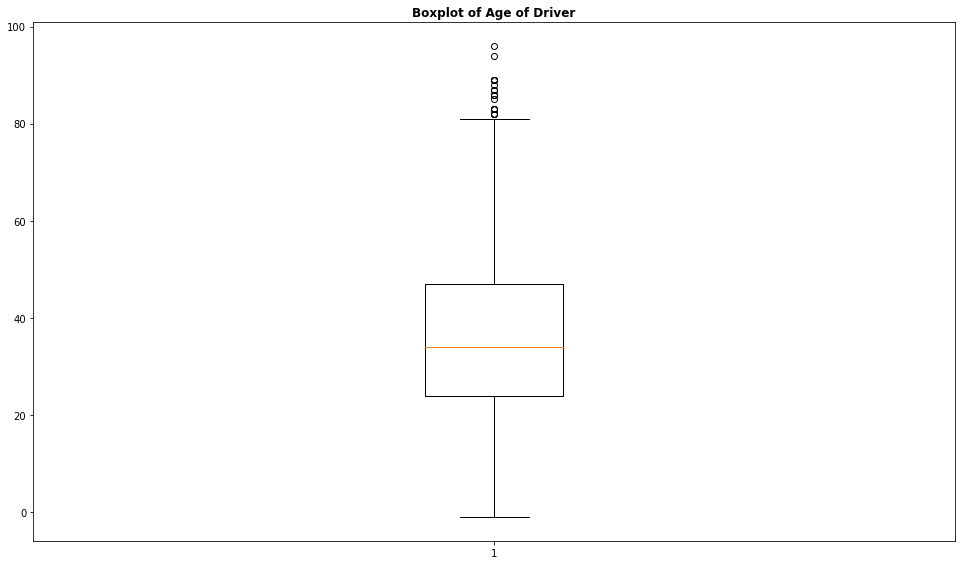

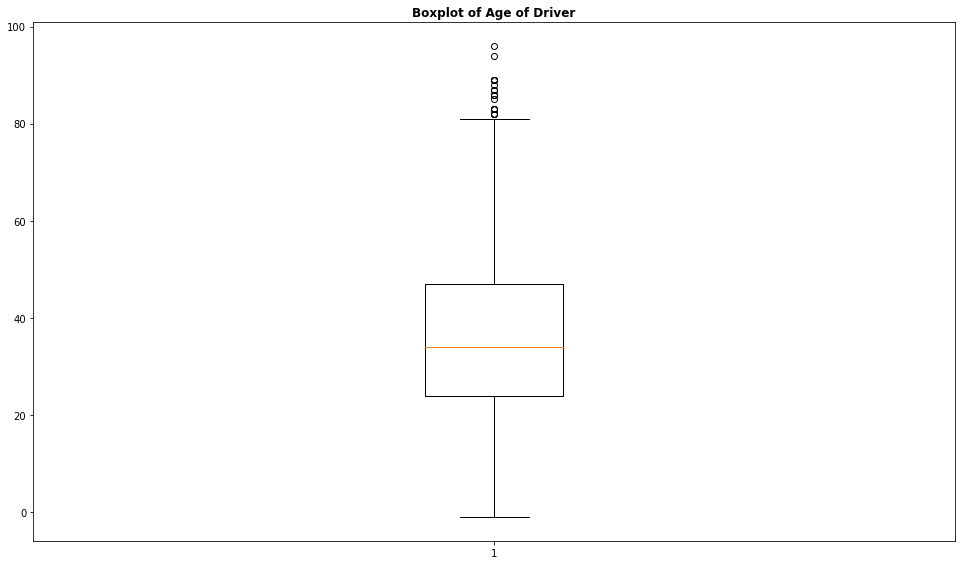

In [28]:
visualise_fivenumsummary(vehicles_lookup[15])

<ipython-input-25-89227453872d>:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


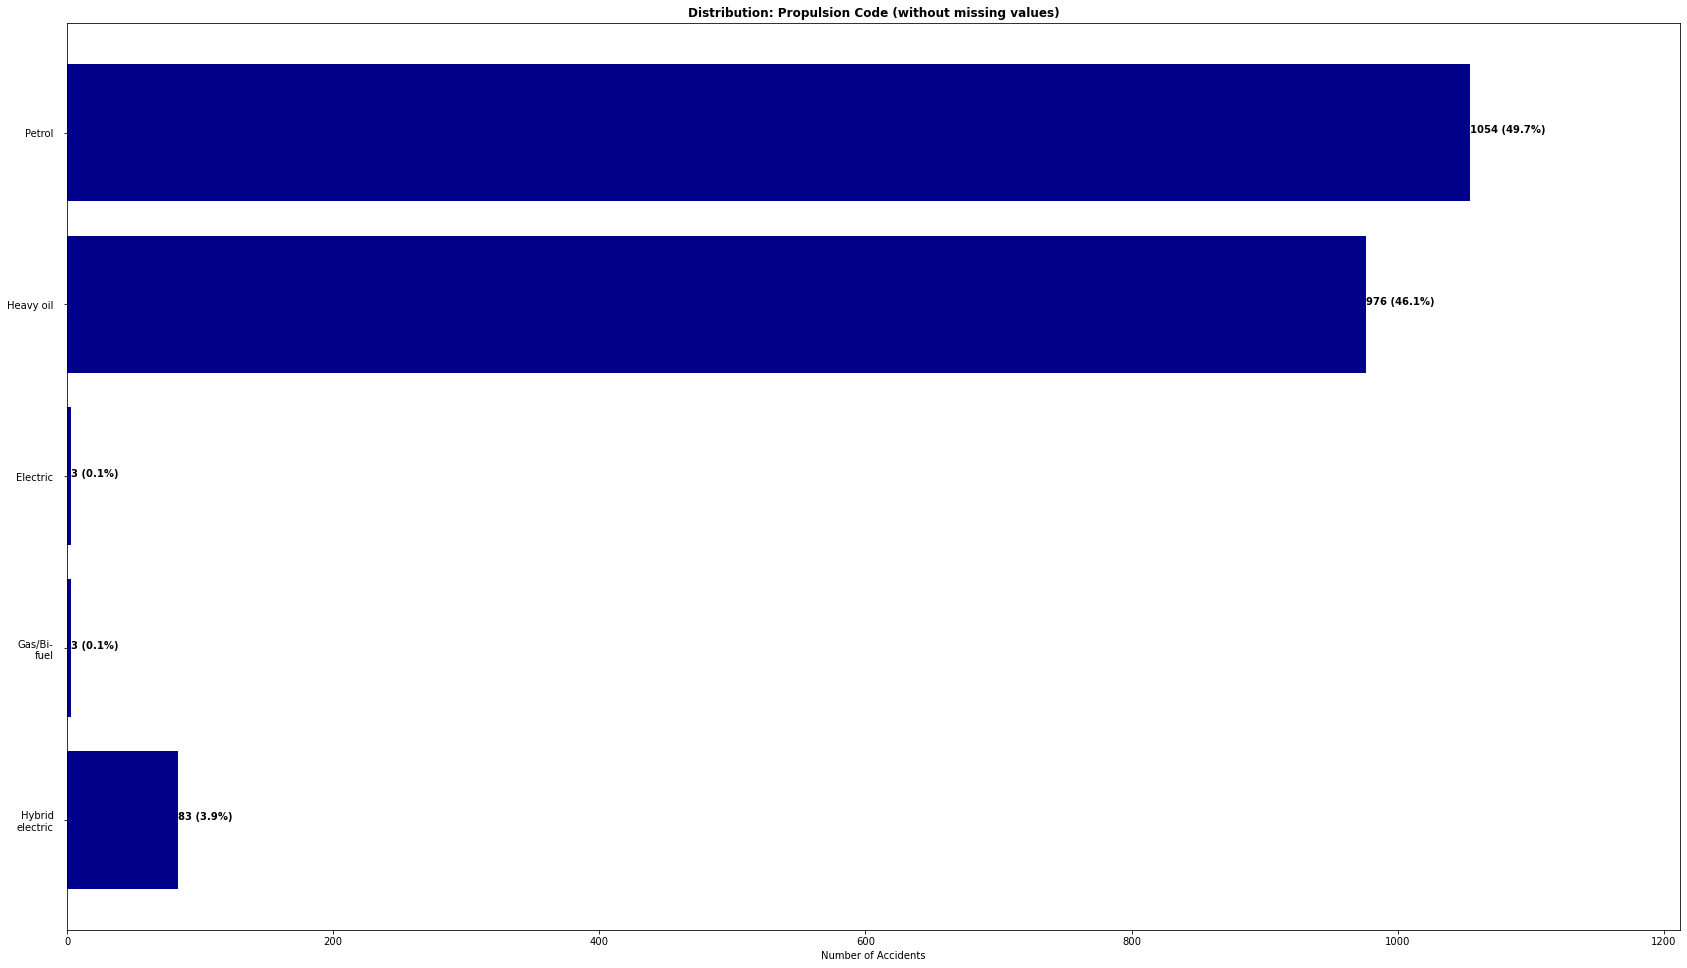

In [29]:
fig = visualise_categorical(vehicles_lookup[18], False)

## Saving Figures
---

In [30]:
def save_figure(figure, index, name, dataset, keep_missing_values=True, boxplot=False):
    if boxplot==False:
        try:
            if keep_missing_values: 
                os.makedirs(f'../reports/figures/{dataset}/with_missing_values')
            else: 
                os.makedirs(f'../reports/figures/{dataset}/no_missing_values')
        except: None

        if keep_missing_values:
            figure.savefig(f'../reports/figures/{dataset}/with_missing_values/{index}_{name}.pdf')
        else: 
            figure.savefig(f'../reports/figures/{dataset}/no_missing_values/{index}_{name}.pdf')

    else:
        try: 
            os.makedirs(f'../reports/figures/{dataset}/boxplots')
        except: None
    
        figure.savefig(f'../reports/figures/{dataset}/boxplots/{index}_{name}.pdf')

In [31]:
def save_all(data, name, missing_values):
    for column in range(len(data)):
        if data[column]['Plot'] == 'bar':
            fig = visualise_categorical(data[column], keep_missing_values=missing_values)

            save_figure(fig, column, data[column]['Name'], name, missing_values)
        elif data[column]['Plot'] == 'hist':
            fig = visualise_numerical(data[column], keep_missing_values=missing_values)

            save_figure(fig, column, data[column]['Name'], name, keep_missing_values=missing_values)
        if data[column]['Summary']:
            fig = visualise_fivenumsummary(data[column])

            save_figure(fig, column, data[column]['Name'], name, boxplot=True)

### Accidents
--- 

In [32]:
#save_all(accidents_lookup, 'accidents', missing_values=True)
#save_all(accidents_lookup, 'accidents', missing_values=False)

### Vehicles
---

In [33]:
#save_all(vehicles_lookup, 'vehicles', missing_values=True)
#save_all(vehicles_lookup, 'vehicles', missing_values=False)

### Casualties
---

In [34]:
#save_all(casualties_lookup, 'casualties', missing_values=True)
#save_all(casualties_lookup, 'casualties', missing_values=False)

In [35]:
def Associate(col_name, var, col_two, sheet_one, sheet_two, var_two):
    """
    col_name: (String) Name of the colunm in the first data sheet
    var: (int) Variable number coresponding to the action in the second column in the second sheet
    col_two: (int) Index number for the column in the second sheet
    sheet_one: (string) can either be leeds_accidents, leeds_vehicles or leeds_casualties
    sheet_two: (string) same as sheet_one
    var_two: (int) Index number for the column in sheet one
    """
    #Creates pandas dataframe with two columns
    x = leeds_accidents[["Accident_Index",col_name]]
    #Creates a list with all ID's that have had an accident in the specified junction
    IDs = [x.loc[i][0] for i in range(len(x)) if x.loc[i][1] == var]
    #Finds all type of manouvre accident that happaned in that junction
    ls = [sheet_two.loc[i][col_two] for i in range(len(sheet_two)) if sheet_two.loc[i][0] in IDs]
    #Creates a names list
    names = [vehicles_lookup[col_two]['Map'][i] for i in set(ls)]
    dic = {name:ls.count(i) for i, name in zip(set(ls), names)}
    types = {i:accidents_lookup[var_two]['Map'][i] for i in list(accidents_lookup[var_two]['Map'].keys())}
    return (dic, types)

In [36]:
# names = Associate("Junction_Detail",1, 4,leeds_accidents, leeds_vehicles)
# print(names[1])
#dic, names = Associate("Junction_Detail",11, 5,leeds_accidents, leeds_casualties, 18)
#names

In [37]:
def plot_ass(col_name, var, col_two, sheet_one, sheet_two, var_two):
    for i in list(accidents_lookup[var_two]['Map'].keys()):
        dic, names = Associate(col_name, i, col_two, sheet_one, sheet_two, var_two)

        categories = list(dic.keys())
        counts = list(dic.values())
        fig = plt.figure(figsize=(10, 7))
        axes = fig.add_axes([0, 0, 1, 1])
        axes.bar(categories, counts)
        axes.set_ylabel('Count')
        axes.set_title(names[i]);
        axes.set_xticks(categories)
        plt.xticks(rotation = 45)
        for i,value in zip(range(len(categories)),counts):
            axes.text(i,value, f'{value} ({str(100*round(value/sum(counts), 3))[:5]}%)')  

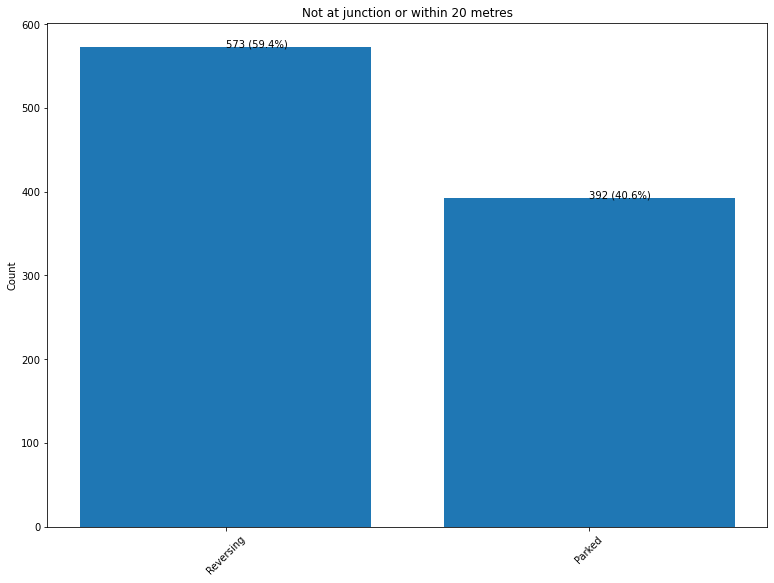

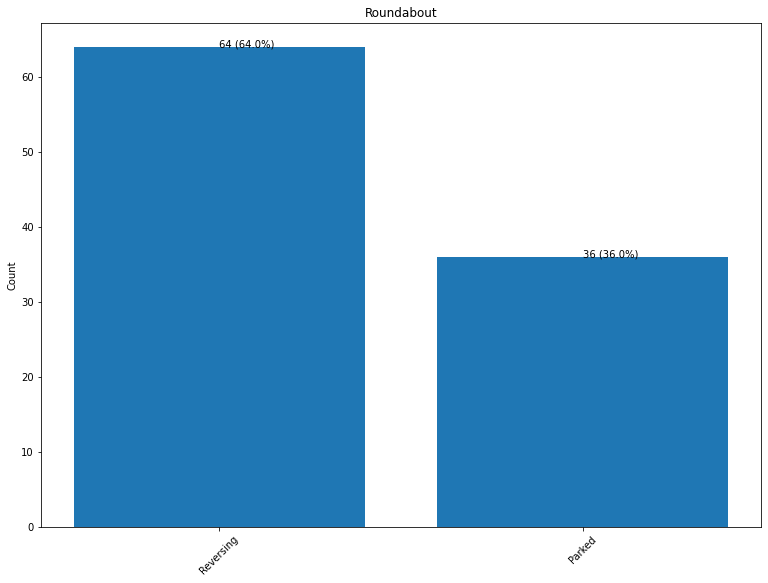

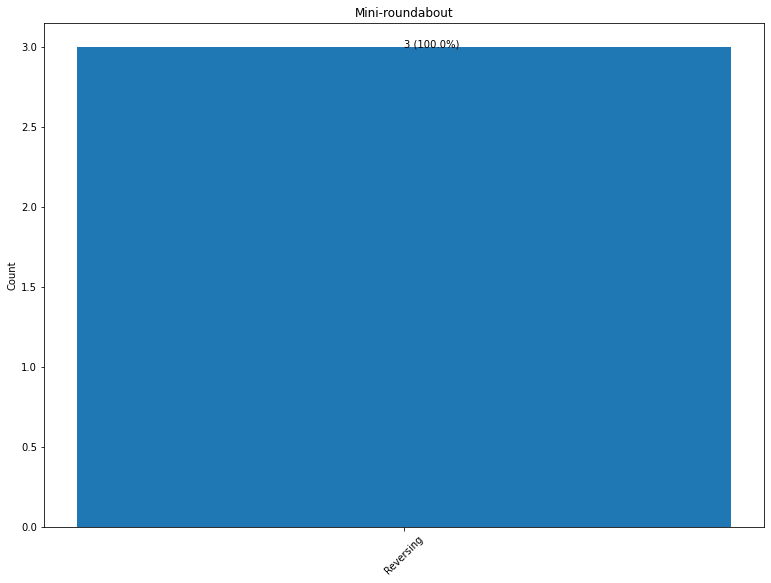

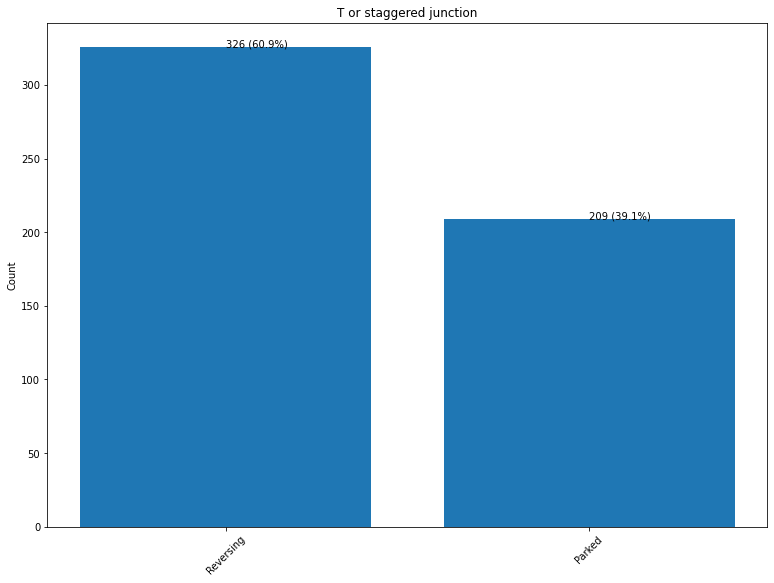

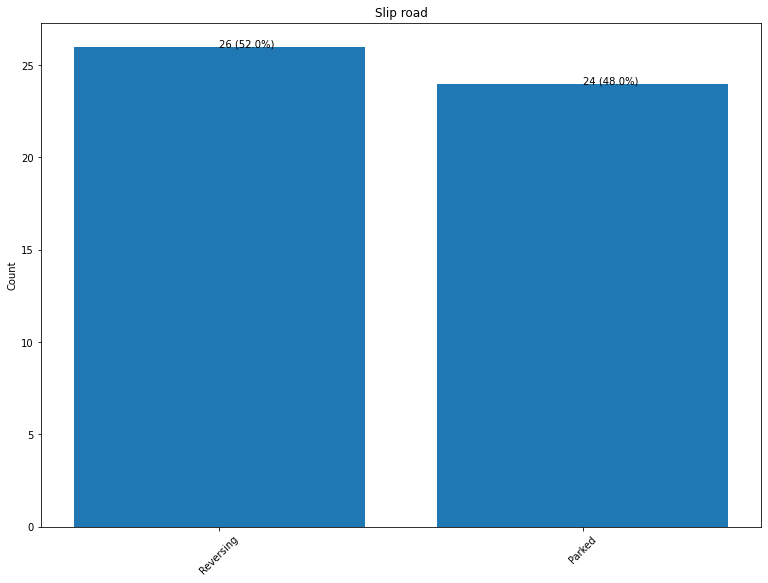

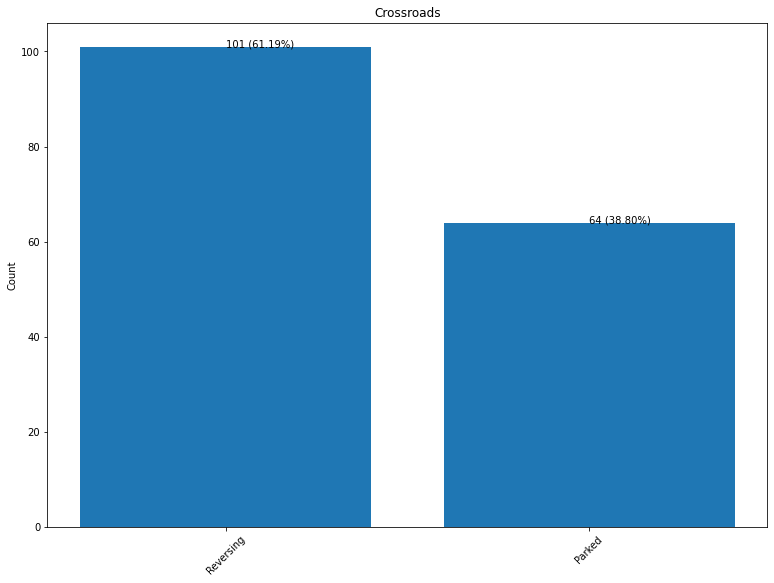

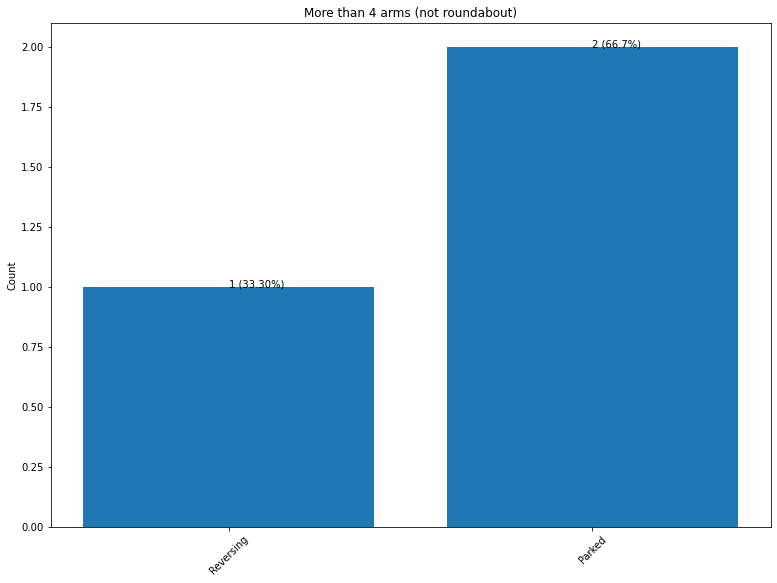

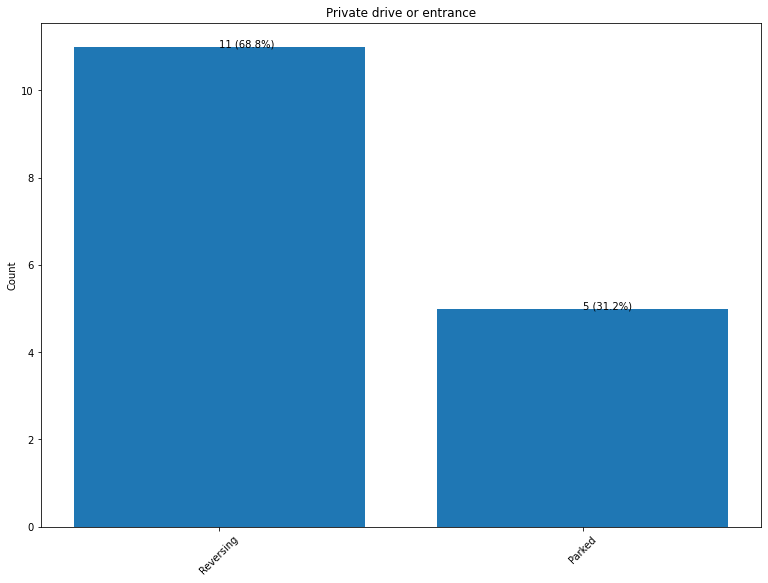

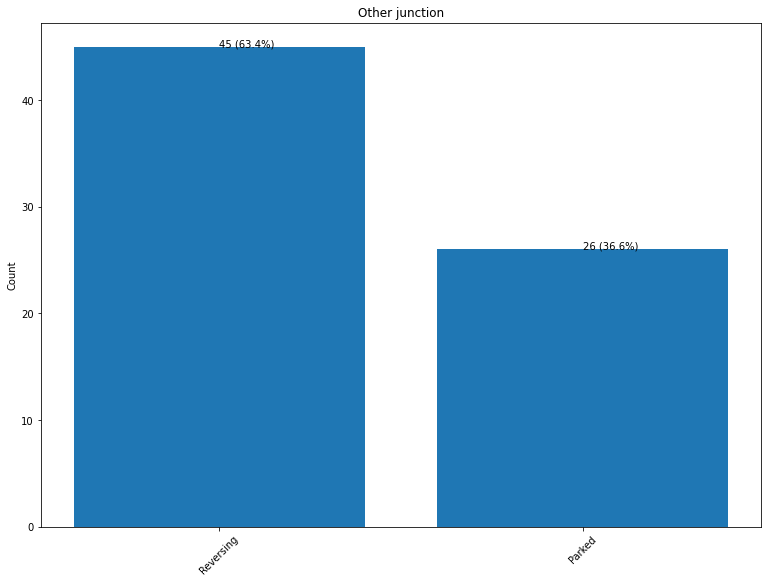

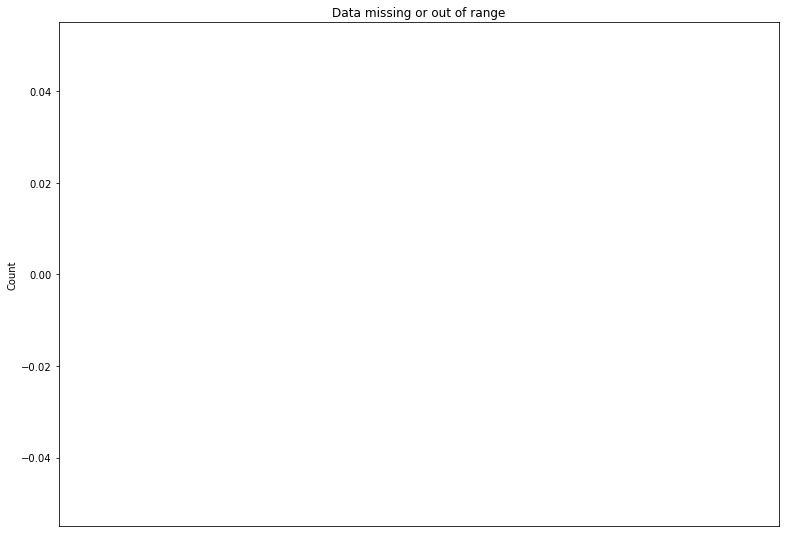

In [38]:
plot_ass("Junction_Detail", "x", 4, leeds_accidents, leeds_casualties, 18)

In [39]:
from scipy.stats import chi2_contingency

In [40]:
#Filter data for bikes
mask_bike = (leeds_vehicles["Vehicle_Type"] == 1)
bike_ids = leeds_vehicles["Accident_Index"][mask_bike]
leeds_accidents_bikes = leeds_accidents[np.isin(leeds_accidents["Accident_Index"], bike_ids)]
leeds_vehicles_bikes = leeds_vehicles[np.isin(leeds_vehicles["Accident_Index"], bike_ids)]
leeds_casualties_bikes = leeds_casualties[np.isin(leeds_casualties["Accident_Index"], bike_ids)]
leeds_vehicles_bikes

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
6,2019136111190,1,9,0,18,0,8,0,0,0,...,6,1,48,8,1686,2,15,7,1,7
7,2019136111190,2,1,0,18,0,8,0,0,0,...,6,1,54,8,-1,-1,-1,5,-1,5
9,2019136111836,1,9,0,9,0,1,0,0,0,...,1,1,51,8,1598,2,7,-1,-1,-1
10,2019136111836,2,1,0,18,0,1,0,0,0,...,6,1,45,7,-1,-1,-1,1,1,1
11,2019136120357,1,19,0,5,0,4,0,0,0,...,1,1,33,6,-1,3,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,2019136CI1657,2,1,0,18,0,1,0,0,0,...,2,1,51,8,-1,-1,-1,-1,-1,-1
2641,2019136CK2067,1,9,0,17,0,0,0,0,0,...,6,1,56,9,1339,1,15,1,1,1
2642,2019136CK2067,2,1,0,18,0,0,0,0,0,...,6,1,31,6,-1,-1,-1,-1,-1,-1
2683,2019136CV0723,1,9,0,18,0,0,0,0,0,...,6,1,72,10,1968,2,4,10,1,10


In [41]:
mask = (leeds_accidents_bikes["Speed_limit"] != -1)
severityspeed = np.array([leeds_accidents_bikes["Speed_limit"][mask], leeds_accidents_bikes["Accident_Severity"][mask]]).T
print(severityspeed.shape)
#print(severityspeed)

mask_junction = (leeds_accidents_bikes["Junction_Detail"] != -1)
severity_junction = np.array([leeds_accidents_bikes["Junction_Detail"][mask_junction], leeds_accidents_bikes["Accident_Severity"][mask]]).T
print(severity_junction.shape)

(238, 2)
(238, 2)


In [195]:
observed_pd = pd.crosstab(severityspeed[:, 0], severityspeed[:, 1], rownames = ["Speed limit"], colnames = ["Accident Severity"]) 
observed = observed_pd.to_numpy()
#print(observed_pd)

observed_pd_junction = pd.crosstab(severity_junction[:, 0], severity_junction[:, 1], rownames = ["Junction detail"], colnames = ["Accident Severity"]) 
observed_junction = observed_pd_junction.to_numpy()
observed

array([[  1,   4,  10],
       [  0,  48, 138],
       [  1,   6,  24],
       [  0,   2,   0],
       [  0,   2,   1],
       [  0,   0,   1]], dtype=int64)

In [206]:
#Exercise
def np_crosstab(ls):
    #Creates two lists. First of all unique of type 0 then of type 1
    uniques0 = list(set([num[0] for num in ls]))
    uniques1 = list(set([num[1] for num in ls]))
    uniques0.sort()
    uniques1.sort()
    #Creates a list going from 0-n, n being the length of uniques of type 0
    maxlenls = [i for i in range(len(uniques0))]
    #Since there can be missing values for type 0 there is created a converter for that
    converter = {uniques0[key]:key for key in maxlenls}
    
    #Creates a master dict with a nested dict. The first keys are of type 1 and the keys in the second dict will betype 0
    dic = {key:dict() for key in uniques1}
    for i in uniques1:
        #Creates list filtered with the different type zero
        ls0 = [ls[num][0] for num in range(len(ls)) if ls[num][1] == i]
        uniques = list(set(ls0))
        for uni in uniques:
            #For all the uniques in the iterated type in the nested dictionary is updated with the converted key value
            dic[i].update({converter[uni]:ls0.count(uni)})
    #Creates an array in the corresponding size of the two types
    arr = np.array([[0]*len(uniques1)]*len(uniques0))
    for i in dic:
        y = dic[i]
        for j in y:
            #j, i-1 position in the array is uptated with the value in the dictionary
            arr[j,i-1] = y[j]
    return arr
    
gr = np_crosstab(severity_junction)

In [210]:
expected = np.zeros(observed.shape, dtype=int) # E, int for being more human-readable
colTotals = observed.sum(axis = 0) # C
rowTotals = observed.sum(axis = 1) # R
N = rowTotals.sum()

for i in range(observed.shape[0]):
    for j in range(observed.shape[1]):
        expected[i,j] = (rowTotals[i] * colTotals[j]) / N
        
expected

array([[  0,   3,  10],
       [  1,  48, 135],
       [  0,   8,  22],
       [  0,   0,   1],
       [  0,   0,   2],
       [  0,   0,   0]])

In [208]:
chiVal, pVal, df, expected = chi2_contingency(observed)
chiVal, pVal, df, expected.astype(int)
print(pVal)

chiVal_junctoin, pVal_junction, df_junction, expected_junction = chi2_contingency(observed_junction)
#chiVal, pVal, df, expected.astype(int)
expected_junction.astype(int)

0.039322295800527714


array([[ 0, 21, 59],
       [ 0,  4, 11],
       [ 0,  0,  1],
       [ 0, 25, 71],
       [ 0,  0,  2],
       [ 0,  5, 15],
       [ 0,  1,  2],
       [ 0,  3,  8]])

In [209]:
V = np.sqrt( (chiVal/N) / (min(observed.shape)-1) )
V

0.20018291538608543

In [46]:
print(observed_junction.shape)
expected_junction.shape

(8, 3)


(8, 3)

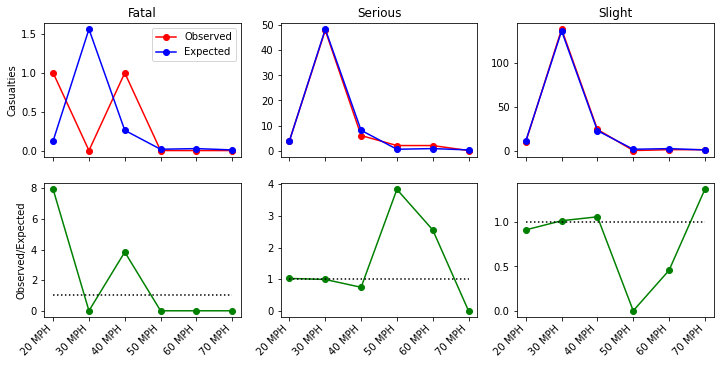

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

severity_labels = ["Fatal", "Serious", "Slight"]
speed_categories = {20: "20 MPH", 30: "30 MPH", 40: "40 MPH", 50: "50 MPH", 60: "60 MPH", 70: "70 MPH"}
x = np.array(list(speed_categories.keys()))

for i, ax in enumerate(axes[0]):
    ax.plot(x, observed[:,i], 'ro-', label='Observed')
    ax.plot(x, expected[:,i], 'bo-', label='Expected')
    if i==0: 
        ax.set_ylabel('Casualties')
        ax.legend(loc='best');
    ax.set_title(severity_labels[i])
    ax.set_xticks(x)
    ax.set_xticklabels(list(speed_categories.values()))
    fig.autofmt_xdate(rotation=45)

for i, ax in enumerate(axes[1]):
    ax.plot(x, observed[:,i]/expected[:,i], 'go-')
    ax.plot(x, np.ones(x.shape), 'k:')
    
    if i==0: 
        ax.set_ylabel('Observed/Expected')
    ax.set_xticks(x)
    ax.set_xticklabels(list(speed_categories.values()))
    fig.autofmt_xdate(rotation=45)

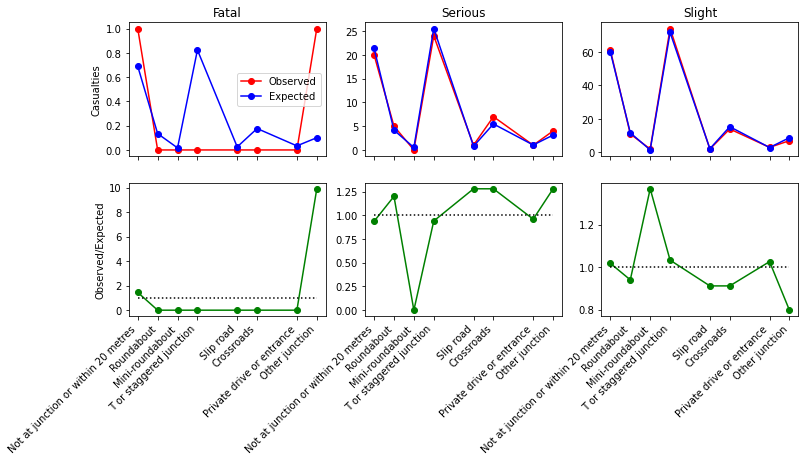

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

severity_labels = ["Fatal", "Serious", "Slight"]
junction_categories = {0: "Not at junction or within 20 metres", 1: "Roundabout", 2: "Mini-roundabout", 3: "T or staggered junction", 5: "Slip road", 6: "Crossroads", 8: "Private drive or entrance", 9: "Other junction"}
x = np.array(list(junction_categories.keys()))

for i, ax in enumerate(axes[0]):
    ax.plot(x, observed_junction[:,i], 'ro-', label='Observed')
    ax.plot(x, expected_junction[:,i], 'bo-', label='Expected')
    if i==0: 
        ax.set_ylabel('Casualties')
        ax.legend(loc='best');
    ax.set_title(severity_labels[i])
    ax.set_xticks(x)
    ax.set_xticklabels(list(junction_categories.values()))
    fig.autofmt_xdate(rotation=45)

for i, ax in enumerate(axes[1]):
    ax.plot(x, observed_junction[:,i]/expected_junction[:,i], 'go-')
    ax.plot(x, np.ones(x.shape), 'k:')
    
    if i==0: 
        ax.set_ylabel('Observed/Expected')
    ax.set_xticks(x)
    ax.set_xticklabels(list(junction_categories.values()))
    fig.autofmt_xdate(rotation=45)